In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('DengueRisk_[Handling missing data].csv')

In [94]:
display(df.head())

,YearWeek,WeekStartDate,District,WeekEndDate,Cases,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),sunshine_duration (s),daylight_duration (s),wind_speed_10m_max (km/h),et0_fao_evapotranspiration (mm)
0,2022-W01,3/01/2022,ampara,9/01/2022,8,24.486,28.9,21.7,50.8,50.8,206686.56,295282.97,21.4,19.92
1,2022-W01,3/01/2022,anuradhapura,9/01/2022,12,24.971,29.9,21.9,14.1,14.1,255617.67,293795.87,20.4,24.22
2,2022-W01,3/01/2022,badulla,9/01/2022,64,21.100,24.9,18.0,78.1,78.1,179577.35,295678.42,14.5,16.71
3,2022-W01,3/01/2022,batticaloa,9/01/2022,26,25.314,28.2,23.1,67.1,67.1,237101.87,294688.95,23.6,21.62
4,2022-W01,3/01/2022,colombo,9/01/2022,563,26.214,32.0,22.8,27.9,27.9,245154.69,295777.20,22.6,29.46


In [95]:
# From the dataset, 'District' is the primary categorical variable.
# 'YearWeek', 'WeekStartDate', and 'WeekEndDate' are string-based but it can be split into numerical in feature enginnering part
# We can encode 'District' using One-Hot Encoding.

In [78]:
print("\nUnique districts:")
print(df['District'].unique())
print(f"Number of unique districts: {df['District'].nunique()}")


Unique districts:
['ampara' 'anuradhapura' 'badulla' 'batticaloa' 'colombo' 'galle'
 'gampaha' 'hambantota' 'jaffna' 'kalmunai' 'kalutara' 'kandy' 'kegalle'
 'kilinochchi' 'kurunegala' 'mannar' 'matale' 'matara' 'mullaitivu'
 'nuwara eliya' 'polonnaruwa' 'puttalam' 'trincomalee' 'vavuniya'
 'monaragala' 'ratnapura']
Number of unique districts: 26


In [79]:
print("Cases per district BEFORE encoding:")
cases_per_district_before = df.groupby("District")["Cases"].sum().reset_index()
print(cases_per_district_before)

Cases per district BEFORE encoding:
        District  Cases
0         ampara    691
1   anuradhapura   2022
2        badulla   4188
3     batticaloa   7133
4        colombo  54456
5          galle  10871
6        gampaha  38829
7     hambantota   3711
8         jaffna  12666
9       kalmunai   2240
10      kalutara  14791
11         kandy  21210
12       kegalle   9076
13   kilinochchi    528
14    kurunegala   8375
15        mannar    799
16        matale   4503
17        matara   5002
18    monaragala   2497
19    mullaitivu    337
20  nuwara eliya    754
21   polonnaruwa   1479
22      puttalam   9412
23     ratnapura   7197
24   trincomalee   4733
25      vavuniya    376


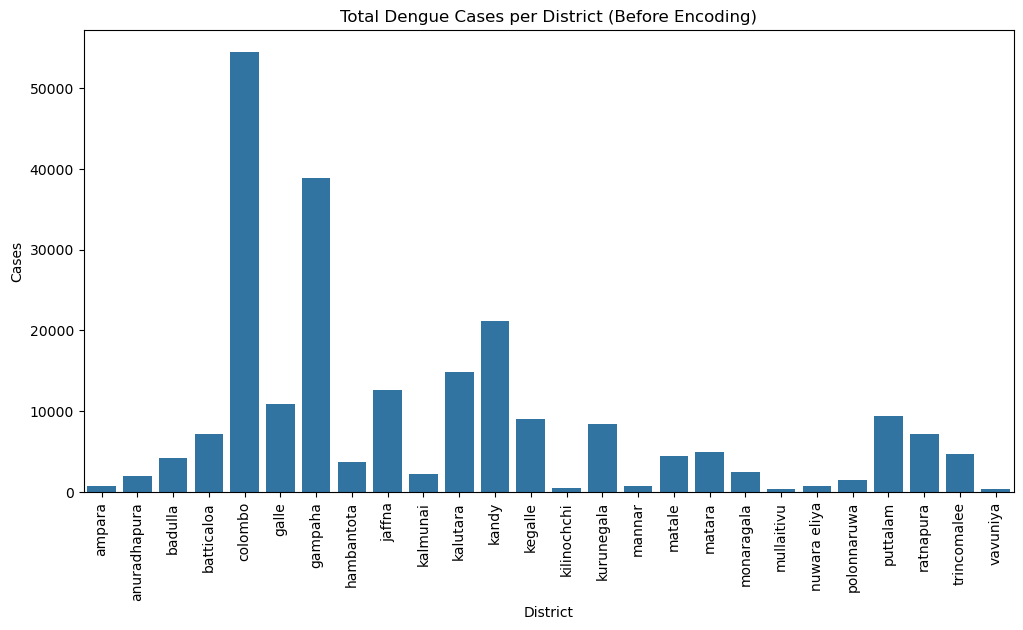

In [80]:

cases_per_district = df.groupby("District")["Cases"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="District", y="Cases", data=cases_per_district)
plt.xticks(rotation=90)
plt.title("Total Dengue Cases per District (Before Encoding)")
plt.show()


In [81]:
# Use One-Hot Encoding for 'District' (creates binary columns for each district)
df_encoded = pd.get_dummies(df, columns=['District'], prefix='District')

In [82]:
display(df_encoded.head())

,YearWeek,WeekStartDate,WeekEndDate,Cases,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),sunshine_duration (s),...,District_matale,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya
0,2022-W01,3/01/2022,9/01/2022,8,24.486,28.9,21.7,50.8,50.8,206686.56,...,False,False,False,False,False,False,False,False,False,False
1,2022-W01,3/01/2022,9/01/2022,12,24.971,29.9,21.9,14.1,14.1,255617.67,...,False,False,False,False,False,False,False,False,False,False
2,2022-W01,3/01/2022,9/01/2022,64,21.100,24.9,18.0,78.1,78.1,179577.35,...,False,False,False,False,False,False,False,False,False,False
3,2022-W01,3/01/2022,9/01/2022,26,25.314,28.2,23.1,67.1,67.1,237101.87,...,False,False,False,False,False,False,False,False,False,False
4,2022-W01,3/01/2022,9/01/2022,563,26.214,32.0,22.8,27.9,27.9,245154.69,...,False,False,False,False,False,False,False,False,False,False


In [83]:
# Encoded as 1 and 0
district_columns = [col for col in df_encoded.columns if col.startswith('District_')]
df_encoded[district_columns] = df_encoded[district_columns].astype(int)

In [84]:
display(df_encoded.head())

,YearWeek,WeekStartDate,WeekEndDate,Cases,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),sunshine_duration (s),...,District_matale,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya
0,2022-W01,3/01/2022,9/01/2022,8,24.486,28.9,21.7,50.8,50.8,206686.56,...,0,0,0,0,0,0,0,0,0,0
1,2022-W01,3/01/2022,9/01/2022,12,24.971,29.9,21.9,14.1,14.1,255617.67,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,3/01/2022,9/01/2022,64,21.100,24.9,18.0,78.1,78.1,179577.35,...,0,0,0,0,0,0,0,0,0,0
3,2022-W01,3/01/2022,9/01/2022,26,25.314,28.2,23.1,67.1,67.1,237101.87,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,3/01/2022,9/01/2022,563,26.214,32.0,22.8,27.9,27.9,245154.69,...,0,0,0,0,0,0,0,0,0,0


In [89]:
print("Cases per district After encoding:")
cases_per_district_After = df.groupby("District")["Cases"].sum().reset_index()
print(cases_per_district_After)

Cases per district After encoding:
        District  Cases
0         ampara    691
1   anuradhapura   2022
2        badulla   4188
3     batticaloa   7133
4        colombo  54456
5          galle  10871
6        gampaha  38829
7     hambantota   3711
8         jaffna  12666
9       kalmunai   2240
10      kalutara  14791
11         kandy  21210
12       kegalle   9076
13   kilinochchi    528
14    kurunegala   8375
15        mannar    799
16        matale   4503
17        matara   5002
18    monaragala   2497
19    mullaitivu    337
20  nuwara eliya    754
21   polonnaruwa   1479
22      puttalam   9412
23     ratnapura   7197
24   trincomalee   4733
25      vavuniya    376


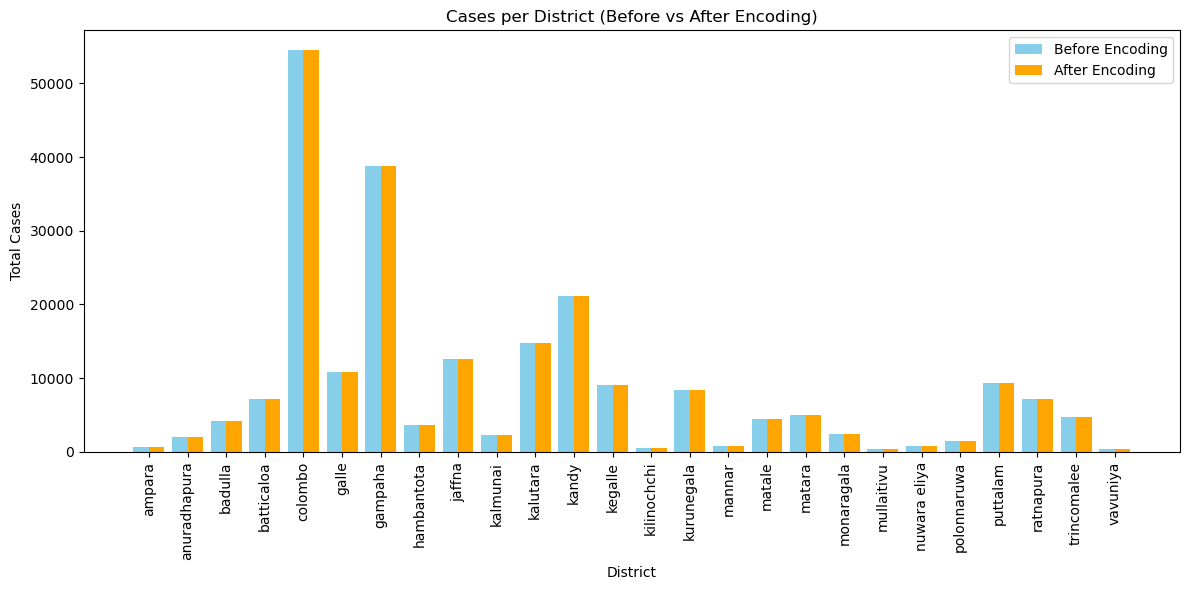

In [91]:
# X positions for districts
x = np.arange(len(cases_per_district_before["District"]))
width = 0.4  # width of each bar

plt.figure(figsize=(12,6))

# Before encoding - Blue
plt.bar(x - width/2, 
        cases_per_district_before["Cases"], 
        width, color="skyblue", label="Before Encoding")

# After encoding - Orange 
plt.bar(x + width/2, 
        cases_per_district_after["Cases"], 
        width, color="orange", label="After Encoding")


plt.xticks(x, cases_per_district_before["District"], rotation=90)
plt.xlabel("District")
plt.ylabel("Total Cases")
plt.title("Cases per District (Before vs After Encoding)")
plt.legend()
plt.tight_layout()
plt.show()


In [65]:
df_encoded.to_csv('DengueRisk_[Encoded test1].csv', index=False)